In [1]:
# initialization
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [32]:
# set the length of the $n$-bit string. 
# n = 2
n = 4

# set the oracle, b for balanced, c for constant
oracle = "b"

# if the oracle is balanced, set the hidden bitstring, b
if oracle == "b":
#     b = 3 # np.random.randint(1,2**n) uncomment for a random value
    b = 13 

# if the oracle is constant, set c = 0 or 1 randomly.
if oracle == "c":
    c = np.random.randint(2)

In [33]:
# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
djCircuit = QuantumCircuit(n+1, n)
barriers = True

# Since all qubits are initialized to |0>, we need to flip the second register qubit to the |1> state
djCircuit.x(n)
# djCircuit.x(1)

# Apply barrier
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to all qubits
djCircuit.h(range(n+1))
    
# Apply barrier 
if barriers:
    djCircuit.barrier()

# Query the oracle
if oracle == "c": # if the oracle is constant, return c
    if c == 1:
        djCircuit.x(n)
    else:
        djCircuit.iden(n)
else: # otherwise, the oracle is balanced and it returns the inner product of the input with b (non-zero bitstring) 
    for i in range(n):
        if (b & (1 << i)):
            djCircuit.cx(i, n)

# Apply barrier 
if barriers:
    djCircuit.barrier()

# Apply Hadamard gates to the first register after querying the oracle
djCircuit.h(range(n))

# Measure the first register
djCircuit.measure(range(n), range(n))

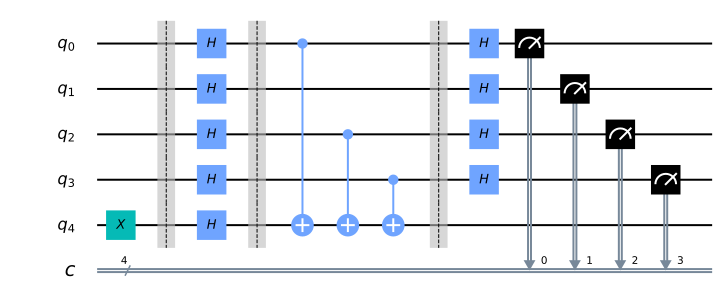

In [34]:
djCircuit.draw(output='mpl')

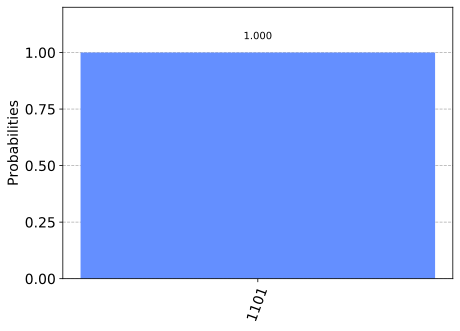

In [35]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(djCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Real devices

In [6]:
# # Load our saved IBMQ accounts and get the least busy backend device with less than or equal to (n+1) qubits
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
#                                    not x.configuration().simulator and x.status().operational==True))
# print("least busy backend: ", backend)

In [7]:
# # Run our circuit on the least busy backend. Monitor the execution of the job in the queue
# from qiskit.tools.monitor import job_monitor

# shots = 1024
# job = execute(djCircuit, backend=backend, shots=shots)

# job_monitor(job, interval = 2)

In [8]:
# # Get the results of the computation
# results = job.result()
# answer = results.get_counts()

# plot_histogram(answer)